In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns
from sympy.physics.quantum.density import fidelity

from src.utils.load_data import load_raw_data, save_csv_data

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))

# Load dataframes

In [2]:
df_movies = pd.read_csv('data/processed/movies.csv')
df_movies.head()

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [3]:
df_characters = pd.read_csv('data/processed/characters.csv')
df_characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor DoB,Actor gender,Actor height (m),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [4]:
df_plots = pd.read_csv('data/processed/plot_summaries.csv')
df_plots.head()

,Wikipedia movie ID,Summary
0,31186339,The nation of Panem consists of a wealthy Capi...
1,20663735,Poovalli Induchoodan is sentenced for six yea...
2,2231378,"The Lemon Drop Kid , a New York City swindler,..."
3,595909,Seventh-day Adventist Church pastor Michael Ch...
4,5272176,The president is on his way to give a speech. ...


In [5]:
# merge movie metadata and plots 
df_movies_summaries = pd.merge(df_movies, df_plots, on='Wikipedia movie ID')
df_movies_summaries.head()

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Summary
0,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
1,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
2,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
3,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."
4,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...


# Preprocessing - Data Distributions 

In [6]:
df_tmdb = pd.read_csv('data/processed/TMDB_movie_dataset_v11.csv')
df_tmdb = df_tmdb[['title', 'status','release_date',
       'revenue', 'runtime', 'budget', 'overview','genres',
       'production_companies', 'production_countries', 'keywords']]

In [7]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128267 entries, 0 to 1128266
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   title                 1128254 non-null  object
 1   status                1128267 non-null  object
 2   release_date          944893 non-null   object
 3   revenue               1128267 non-null  int64 
 4   runtime               1128267 non-null  int64 
 5   budget                1128267 non-null  int64 
 6   overview              900651 non-null   object
 7   genres                677445 non-null   object
 8   production_companies  509961 non-null   object
 9   production_countries  629797 non-null   object
 10  keywords              306760 non-null   object
dtypes: int64(3), object(8)
memory usage: 94.7+ MB


In [8]:
df_tmdb['genres'].explode().tolist()


['Action, Science Fiction, Adventure',
 'Adventure, Drama, Science Fiction',
 'Drama, Action, Crime, Thriller',
 'Action, Adventure, Fantasy, Science Fiction',
 'Science Fiction, Action, Adventure',
 'Action, Adventure, Comedy',
 'Adventure, Action, Science Fiction',
 'Drama',
 'Action, Science Fiction, Adventure',
 'Thriller, Crime',
 'Comedy, Drama, Romance',
 'Adventure, Fantasy',
 'Action, Science Fiction, Adventure',
 'Drama, Western',
 'Drama, Crime',
 'Adventure, Science Fiction, Action',
 'Action, Science Fiction',
 'Drama, Romance',
 'Crime, Thriller, Drama',
 'Adventure, Fantasy, Action',
 'Adventure, Fantasy, Action',
 'Drama, Thriller, Mystery',
 'Crime, Drama, Comedy',
 'Action, Adventure, Science Fiction',
 'Adventure, Action, Science Fiction',
 'Action, Crime, Drama, Thriller',
 'Action, Adventure, Science Fiction',
 'Action, Adventure, Science Fiction',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Science Fiction',
 'Drama, Thriller, War',
 'Science Fiction, Adve

In [9]:
df_tmdb.shape

(1128267, 11)

In [10]:
test.shape

NameError: name 'test' is not defined

In [26]:
df_tmdb['status'].value_counts()

status
Released           1102948
In Production        10047
Post Production       7942
Planned               6683
Rumored                344
Canceled               303
Name: count, dtype: int64

In [51]:
# Keep only the released movies
df_tmdb = df_tmdb[df_tmdb['status'] == 'Released']

In [52]:
df_tmdb['revenue'].shape

(1102948,)

In [54]:
test = 
test['revenue'].shape

(1082327,)

In [55]:
test = df_tmdb[df_tmdb['revenue']>=0]
test['revenue'].shape


(1102947,)

In [29]:
test = df_tmdb[df_tmdb['release_date'].str.len()!=10]
test['release_date'].shape


(166521,)

In [32]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb['release_date'].dropna(inplace=True)
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1102948 entries, 0 to 1128266
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   title                 1102937 non-null  object        
 1   status                1102948 non-null  object        
 2   release_date          936427 non-null   datetime64[ns]
 3   revenue               1102948 non-null  int64         
 4   runtime               1102948 non-null  int64         
 5   budget                1102948 non-null  int64         
 6   overview              881019 non-null   object        
 7   genres                658951 non-null   object        
 8   production_companies  495932 non-null   object        
 9   production_countries  614086 non-null   object        
 10  keywords              300428 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 101.0+ MB


In [35]:
from src.data.process_data import *

## Movies 
### Languages

In [38]:
df_movies["Lang names"] = df_movies["Languages"].apply(extract_tuples_values)
df_movies["Lang names"].head()

0                 [English Language]
1               [Norwegian Language]
2                 [English Language]
3                  [German Language]
4    [Silent film, English Language]
Name: Lang names, dtype: object

In [109]:
df = load_raw_data('data/raw/plot_summaries.txt', sep='\t', headers=['wikipedia_movie_id', 'summary'])
save_csv_data(df, 'data/processed/plot_summaries.csv')

### Genres
### Release dates
### Runtimes 
### Box office revenues
### Countries 
## Actors 
### Gender
### Ages (DoB and age during movie) 
### Ethnicity 
### Height?

# Preprocessing - Cleaning 

In [23]:
from src.data.process_data import *

In [116]:
%run src/data/clean_data.py

sep ,
headers []
original df shape (1127777, 24)
after status (1102507, 24)
after release date (760743, 24)
after release year (760743, 25)
after duplicates (746388, 25)
after numeric columns (746387, 25)
after string to list (746387, 25)
after select columns (746387, 13)
sep 	
headers ['wikipedia_movie_id', 'freebase_ID', 'title', 'release_year', 'revenue', 'runtime', 'languages', 'countries', 'genres']
original df shape (81740, 9)
after status (81740, 9)
after release date (81740, 9)
after release year (44006, 9)
after duplicates (43915, 9)
after numeric columns (43915, 9)
after string to list (43915, 9)
after select columns (43915, 5)


In [110]:
df_movies = pd.read_csv('data/processed/movies.csv')
df_plots = pd.read_csv('data/processed/plot_summaries.csv')
df_tmdb = pd.read_csv('data/processed/TMDB_clean.csv')

In [111]:
print(df_movies.columns.tolist())
print(df_plots.columns.tolist())
print(df_tmdb.columns.tolist())


['wikipedia_movie_id', 'title', 'release_year', 'revenue', 'runtime']
['wikipedia_movie_id', 'summary']
['title', 'release_date', 'revenue', 'runtime', 'budget', 'original_language', 'overview', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'release_year']


In [95]:
common_columns = list(set(df_movies.columns.tolist()) & set(df_tmdb.columns.tolist()))
common_columns.remove('release_year')
common_columns

['title', 'revenue', 'runtime']

In [119]:
%run src/data/process_data.py

In [97]:
df_combined = combine_dataframes(df_movies=df_movies, df_plots=df_plots, df_tmdb=df_tmdb, common_columns=common_columns, cutoffyear=2012)

Index(['title_cmu', 'release_year', 'revenue_cmu', 'runtime_cmu', 'summary',
       'clean_title', 'title_tmdb', 'release_date', 'revenue_tmdb',
       'runtime_tmdb', 'budget', 'original_language', 'overview', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [98]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430770 entries, 0 to 746386
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          430770 non-null  int64 
 1   summary               364351 non-null  object
 2   release_date          430770 non-null  object
 3   budget                430770 non-null  int64 
 4   original_language     430770 non-null  object
 5   overview              364213 non-null  object
 6   genres                430770 non-null  object
 7   production_companies  430770 non-null  object
 8   production_countries  430770 non-null  object
 9   spoken_languages      430770 non-null  object
 10  keywords              430770 non-null  object
 11  title                 430767 non-null  object
 12  revenue               430770 non-null  int64 
 13  runtime               430770 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 49.3+ MB


In [99]:
df_combined.head()

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,revenue,runtime
0,1987,"A series of murders of rich young women throughout Arizona bear distinctive signatures of a serial killer. Clues lead Detective Charles Mendoza to visit Paul White, a sound expert installing hi-fi systems in wealthy people's homes. His special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. He is married to Joan, whom, ten years earlier, he had seduced away from Mike DeSantos, her then current boyfriend. Joan is questioned by Mendoza, but does not believe his insinuations that her husband is somehow involved in the murders. Various flashbacks show Joan's previous relationship to Mike and later explain how it came to be that he abandoned her. The couple met Paul and befriended him. At Mike's suggestion, he and Mike go on a deer hunting trip together. Paul shoots a deer and brutally mutilates it, demonstrating his sick fascination with killing. This is partly intended to scare Mike off, which it does. Mike catches Joan and Paul after they've made love, and Paul declares that he will take Mike's place. ""I am the one,"" Paul says. Mike puts his gun at the back of Paul's head but decides not to kill and abandons Joan. By now Joan has run into Mike DeSantos working at a gas station in a neighboring town. Mike tells her he got out of prison after suffering a major head injury; he thinks life is looking up. He makes her promise not to tell Paul that she has seen him. Joan soon discovers Paul has committed adultery. By puncturing Paul's tires she provides him with an alibi for the most recent killing. He begs her forgiveness as the police turn their suspicions away from him. At home, Joan looks into a crawl space in the house, and discovers preserved body parts of Paul's victims wrapped in paper and plastic. Joan confronts Paul, and Paul tries to explain his motivations for killing. He believes he has been ""chosen"" and is expressing the nothingness of the universe, whose heart is female and destructive like a black hole. He is putting women ""out of their misery,"" but he loves Joan. Joan's distrust of Mike over the next night and day agitates him into a fury. First, he tries to imprison her and then kill her and his daughter. He heavily arms himself and paints his face to look like a samurai warrior or an Indian brave. Joan and the little girl escape in different directions and soon Joan has to elude Paul in the abandoned quarry. It turns out Mike has been staying there, armed with a machine gun, certain that he will meet Paul again. He rescues Joan and takes away Paul's gun, leading him to the edge of the quarry. Paul makes the sound he uses in the emptiness of living rooms and savors its echo from the quarry. While incessantly pontificating about his philosophies of life and death, Paul reveals a lighter with which he has lit the fuse of his explosive vest. Mike opens fire on him with a machine gun and Joan dives into the lake in the quarry. Paul and Mike both die instantly, in a hail of destruction. Joan is reunited later with her daughter. She talks with Detective Mendoza about what the ten years with Paul could have meant, whose destructive and nihilistic nature she never understood. Based on the 1983 novel Mrs White by Margaret Tracy .",1987-06-19,0,en,"In a wealthy and isolated desert community, a sound expert is targeted as the prime suspect of a series of brutal murders of local suburban housewives who were attacked and mutilated in their homes. As he desperately tries to prove his innocence, his wife starts to uncover startling truths...","['Horror', 'Thriller']","[""Mrs. White's Productions""]",['United Kingdom'],['English'],"['based on novel or book', 'gas station', 'psychopath', 'insanity', 'detective', 'arizona', 'slasher', 'series of m

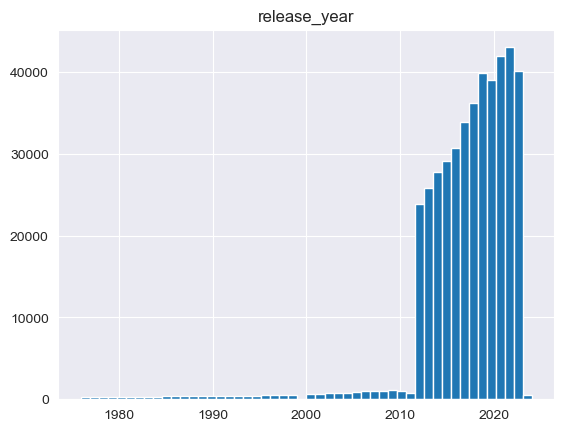

In [100]:
df_combined.hist('release_year', bins=50)
plt.show()

<Figure size 2000x600 with 0 Axes>

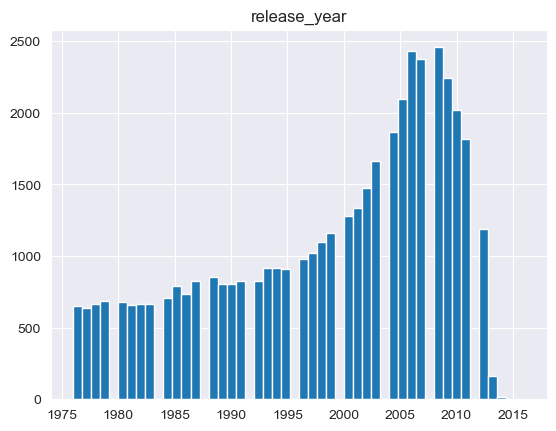

In [101]:
plt.figure(figsize=(20,6))
df_movies.hist('release_year', bins=50)
plt.show()

In [104]:
df_combined = annotate_dvd_era(df_combined)

In [107]:
df_combined.groupby('dvd_era').size()

dvd_era
during      7081
post      415558
pre         8131
dtype: int64

In [120]:
df_combined2 = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv')

In [118]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430770 entries, 0 to 746386
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          430770 non-null  int64 
 1   summary               364351 non-null  object
 2   release_date          430770 non-null  object
 3   budget                430770 non-null  int64 
 4   original_language     430770 non-null  object
 5   overview              364213 non-null  object
 6   genres                430770 non-null  object
 7   production_companies  430770 non-null  object
 8   production_countries  430770 non-null  object
 9   spoken_languages      430770 non-null  object
 10  keywords              430770 non-null  object
 11  title                 430767 non-null  object
 12  revenue               430770 non-null  int64 
 13  runtime               430770 non-null  int64 
 14  dvd_era               430770 non-null  object
dtypes: int64(4), object(11

In [121]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430770 entries, 0 to 746386
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          430770 non-null  int64 
 1   summary               364351 non-null  object
 2   release_date          430770 non-null  object
 3   budget                430770 non-null  int64 
 4   original_language     430770 non-null  object
 5   overview              364351 non-null  object
 6   genres                430770 non-null  object
 7   production_companies  430770 non-null  object
 8   production_countries  430770 non-null  object
 9   spoken_languages      430770 non-null  object
 10  keywords              430770 non-null  object
 11  title                 430767 non-null  object
 12  revenue               430770 non-null  int64 
 13  runtime               430770 non-null  int64 
 14  dvd_era               430770 non-null  object
dtypes: int64(4), object(11